# Import Required Libraries
Import the necessary libraries such as pandas, numpy, matplotlib, and seaborn.

In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Ensure plots are displayed inline in Jupyter Notebook
%matplotlib inline

# Load the Datasets
Load the Customers.csv, Products.csv, and Transactions.csv datasets using pandas.

In [2]:
# Load the Datasets

# Load the Customers dataset
customers_df = pd.read_csv('Customers.csv')

# Load the Products dataset
products_df = pd.read_csv('Products.csv')

# Load the Transactions dataset
transactions_df = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataset to verify loading
print("Customers Dataset:")
print(customers_df.head())

print("\nProducts Dataset:")
print(products_df.head())

print("\nTransactions Dataset:")
print(transactions_df.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

# Data Cleaning and Preprocessing
Perform data cleaning and preprocessing steps such as handling missing values, converting data types, and merging datasets.

In [3]:
# Data Cleaning and Preprocessing

# Check for missing values in the datasets
print("Missing values in Customers dataset:")
print(customers_df.isnull().sum())

print("\nMissing values in Products dataset:")
print(products_df.isnull().sum())

print("\nMissing values in Transactions dataset:")
print(transactions_df.isnull().sum())

# Handle missing values if any (for this example, we'll drop rows with missing values)
customers_df.dropna(inplace=True)
products_df.dropna(inplace=True)
transactions_df.dropna(inplace=True)

# Convert data types if necessary
# Convert 'SignupDate' and 'TransactionDate' to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Merge datasets
# Merge transactions with customers on 'CustomerID'
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')

# Merge the result with products on 'ProductID'
merged_df = pd.merge(merged_df, products_df, on='ProductID', how='inner')

# Display the first few rows of the merged dataset to verify
print("\nMerged Dataset:")
print(merged_df.head())

Missing values in Customers dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Merged Dataset:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Euro

# Exploratory Data Analysis (EDA)
Conduct EDA to understand the data distribution, relationships, and patterns.


Summary Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023

C:\Users\Jeevanprasath\AppData\Local\Temp\ipykernel_7488\2570601481.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_df, x='Region', palette='viridis')


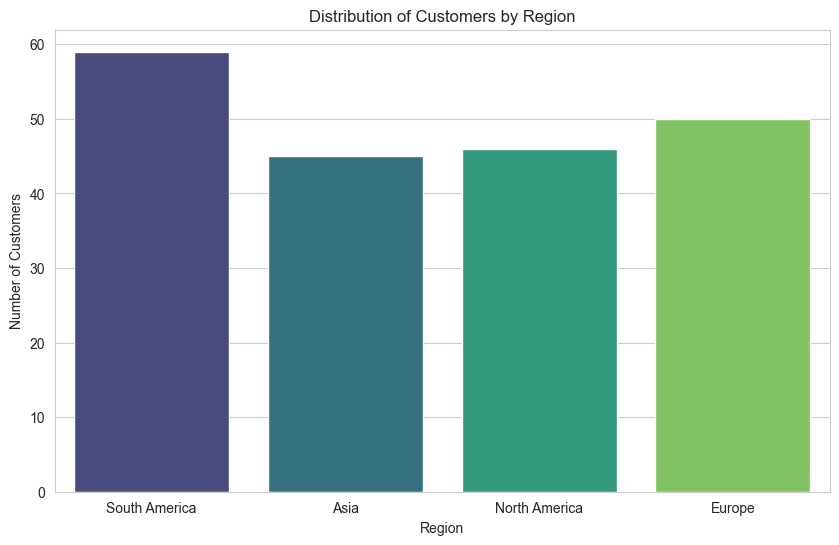

C:\Users\Jeevanprasath\AppData\Local\Temp\ipykernel_7488\2570601481.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products_df, x='Category', palette='viridis')


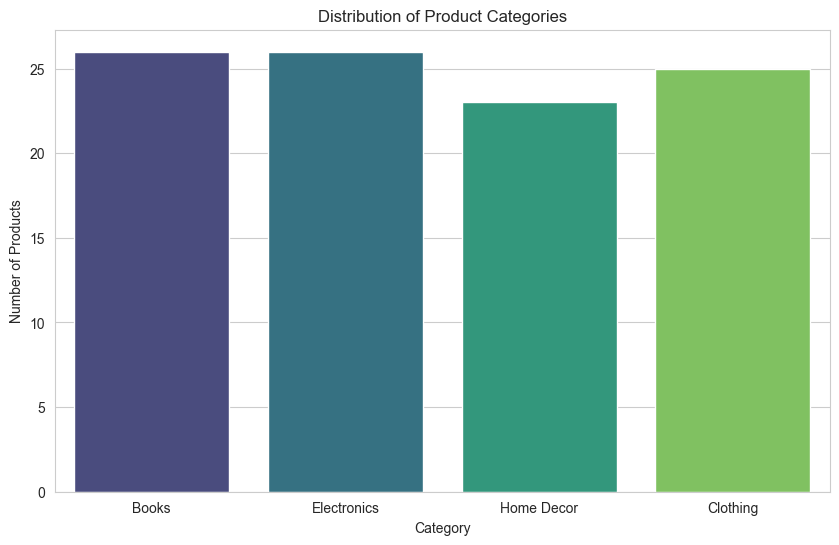

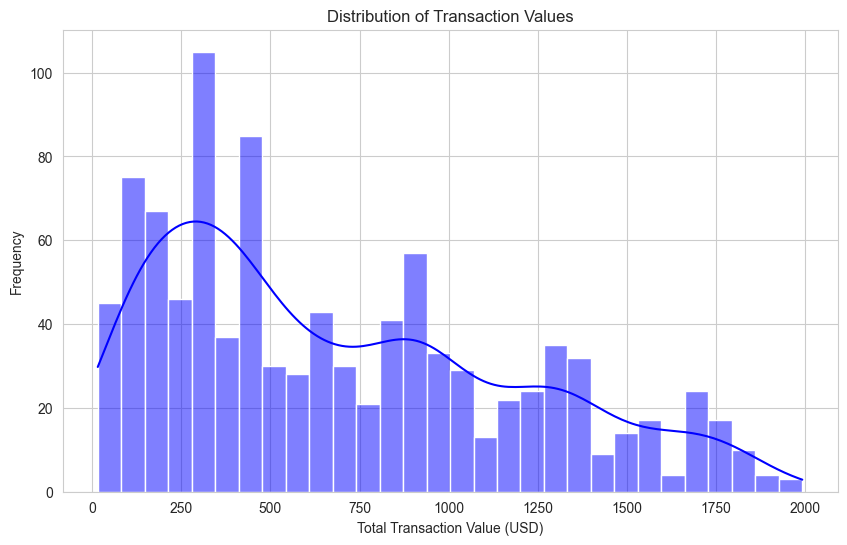

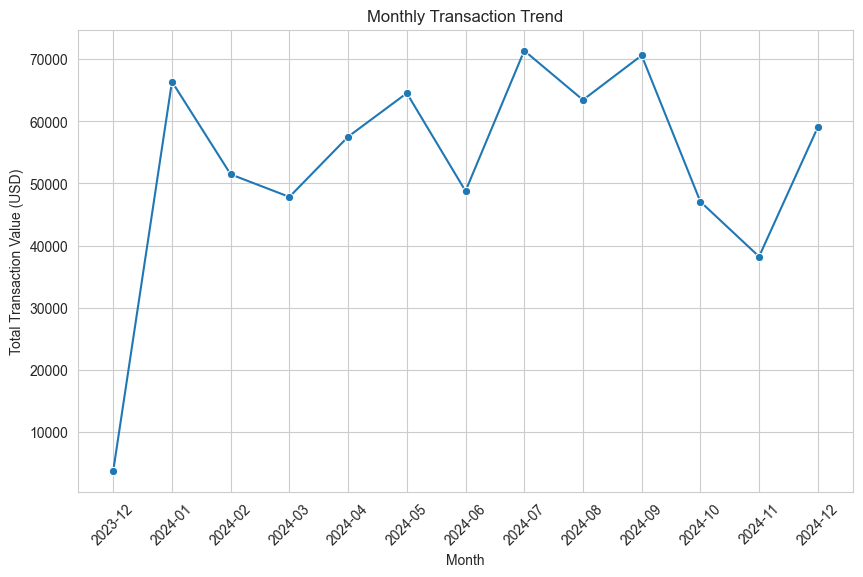

C:\Users\Jeevanprasath\AppData\Local\Temp\ipykernel_7488\2570601481.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='TotalValue', y='CustomerName', palette='viridis')


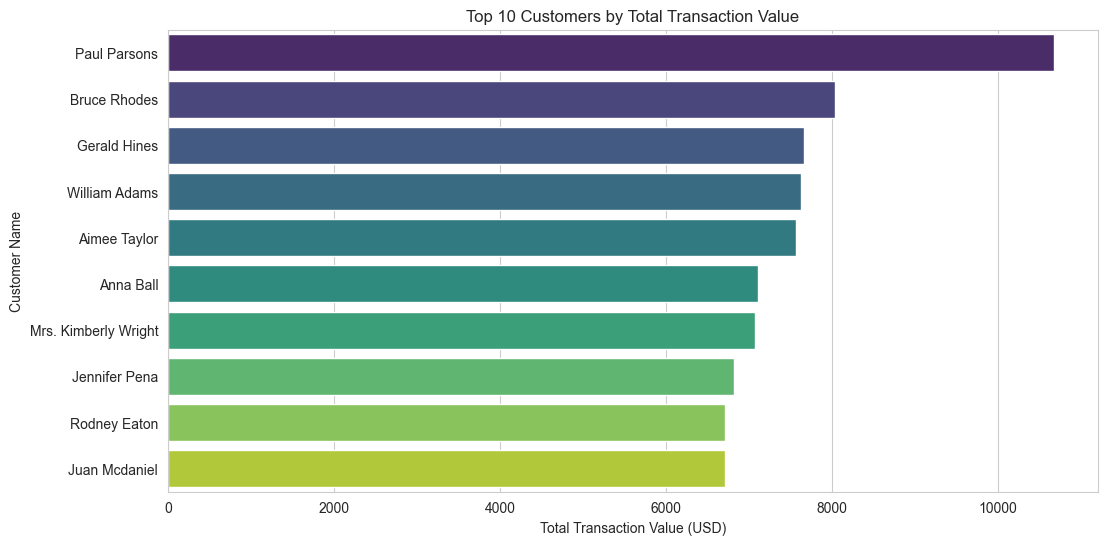

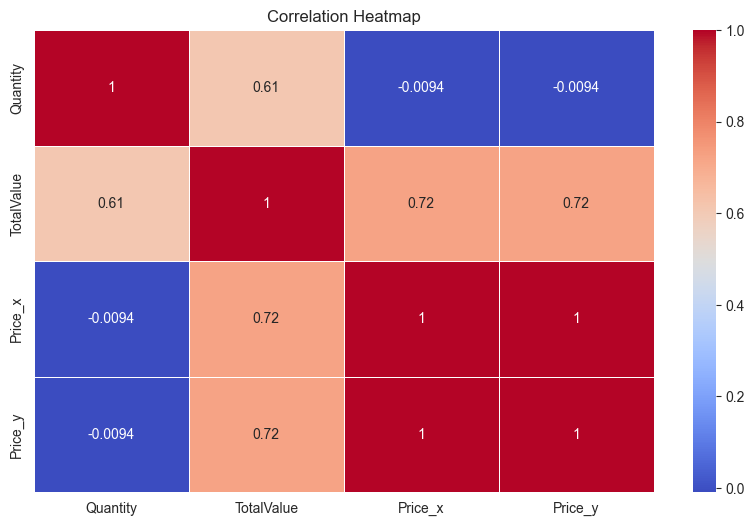

In [13]:
# Exploratory Data Analysis (EDA)

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(merged_df.describe())

# Distribution of customers by region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='Region', palette='viridis')
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# Distribution of product categories
plt.figure(figsize=(10, 6))
sns.countplot(data=products_df, x='Category', palette='viridis')
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

# Distribution of transaction values
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['TotalValue'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Transaction Value (USD)')
plt.ylabel('Frequency')
plt.show()

merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_trend = merged_df.groupby('TransactionMonth')['TotalValue'].sum().reset_index()

# Convert 'TransactionMonth' to string for plotting
monthly_trend['TransactionMonth'] = monthly_trend['TransactionMonth'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='TransactionMonth', y='TotalValue', marker='o')
plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value (USD)')
plt.xticks(rotation=45)
plt.show()

# Top 10 customers by total transaction value
top_customers = merged_df.groupby('CustomerName')['TotalValue'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='TotalValue', y='CustomerName', palette='viridis')
plt.title('Top 10 Customers by Total Transaction Value')
plt.xlabel('Total Transaction Value (USD)')
plt.ylabel('Customer Name')
plt.show()

# Select only numeric columns for the correlation matrix
numeric_df = merged_df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Customer Analysis
Analyze customer data to understand demographics, signup trends, and regional distribution.

C:\Users\Jeevanprasath\AppData\Local\Temp\ipykernel_7488\4067063844.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_df, x='Region', palette='viridis')


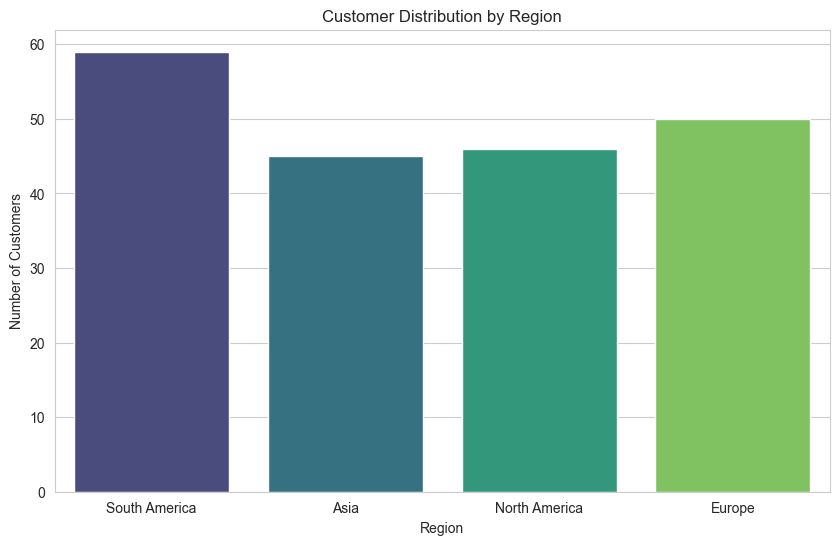

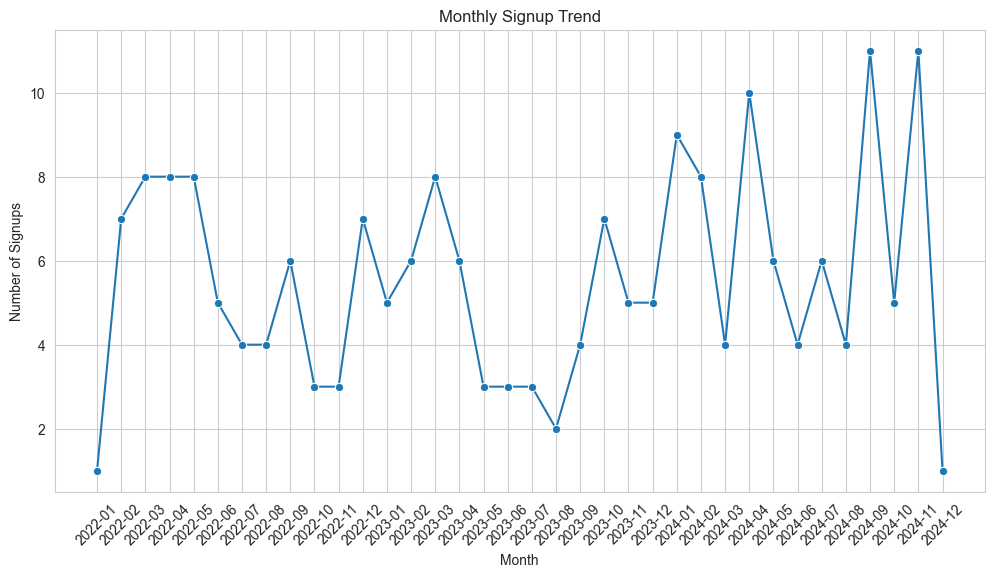

The 'Age' column does not exist in the customers_df DataFrame.


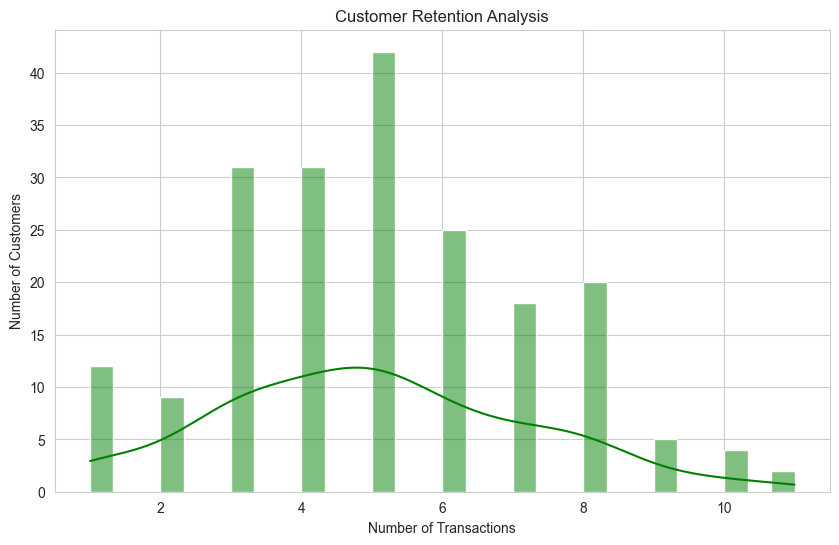

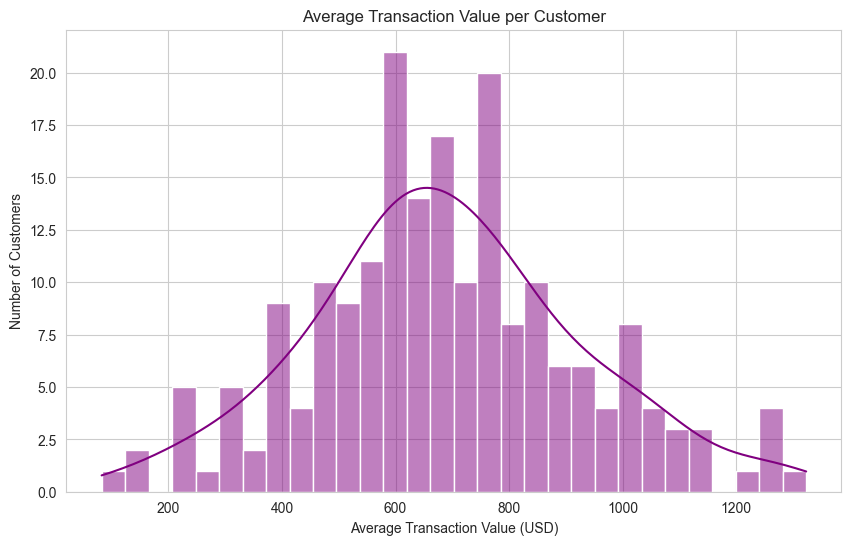

In [20]:
# Customer Analysis

# Analyze customer demographics
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# Analyze signup trends over time
# Convert 'SignupDate' to datetime if it's not already
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

# Extract 'SignupMonth' from 'SignupDate'
customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')

# Group by 'SignupMonth' and count the number of signups
signup_trend = customers_df.groupby('SignupMonth').size().reset_index(name='Signups')

# Convert 'SignupMonth' to string for plotting
signup_trend['SignupMonth'] = signup_trend['SignupMonth'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=signup_trend, x='SignupMonth', y='Signups', marker='o')
plt.title('Monthly Signup Trend')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

# Analyze customer age distribution if age data is available
# Assuming 'Age' column exists in customers_df
if 'Age' in customers_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(customers_df['Age'], bins=30, kde=True, color='blue')
    plt.title('Customer Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The 'Age' column does not exist in the customers_df DataFrame.")

# Analyze customer retention by calculating the number of transactions per customer
customer_transactions = merged_df.groupby('CustomerID').size().reset_index(name='TransactionCount')

plt.figure(figsize=(10, 6))
sns.histplot(customer_transactions['TransactionCount'], bins=30, kde=True, color='green')
plt.title('Customer Retention Analysis')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

# Analyze average transaction value per customer
avg_transaction_value = merged_df.groupby('CustomerID')['TotalValue'].mean().reset_index(name='AvgTransactionValue')

plt.figure(figsize=(10, 6))
sns.histplot(avg_transaction_value['AvgTransactionValue'], bins=30, kde=True, color='purple')
plt.title('Average Transaction Value per Customer')
plt.xlabel('Average Transaction Value (USD)')
plt.ylabel('Number of Customers')
plt.show()

# Product Analysis
Analyze product data to understand category distribution, pricing trends, and popular products.

C:\Users\Jeevanprasath\AppData\Local\Temp\ipykernel_7488\2988551694.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products_df, x='Category', palette='viridis')


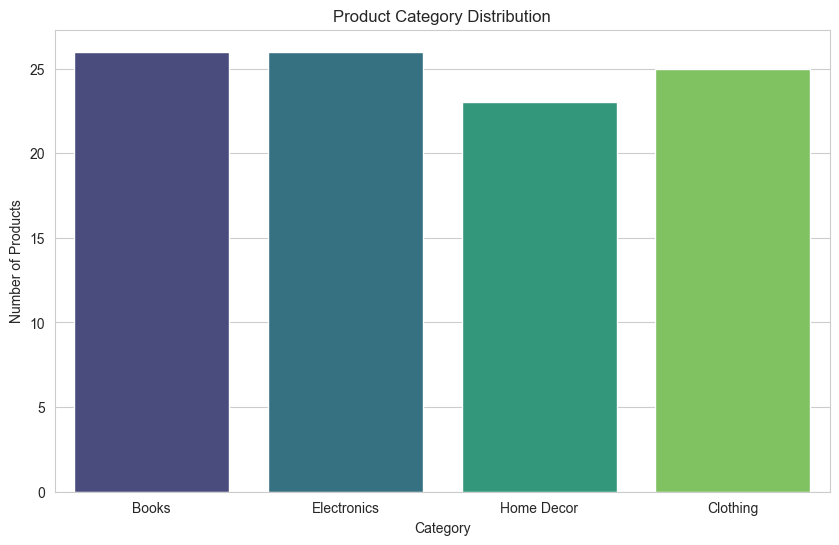

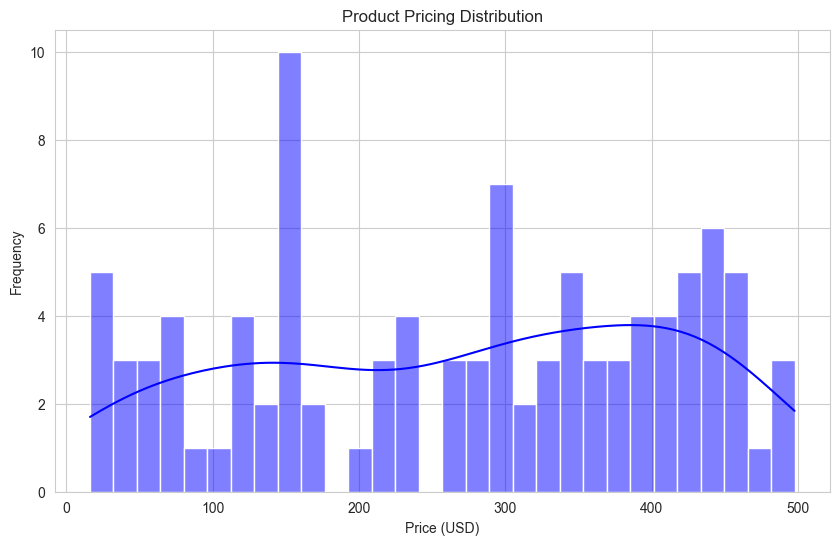

C:\Users\Jeevanprasath\AppData\Local\Temp\ipykernel_7488\2988551694.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Quantity', y='ProductName', palette='viridis')


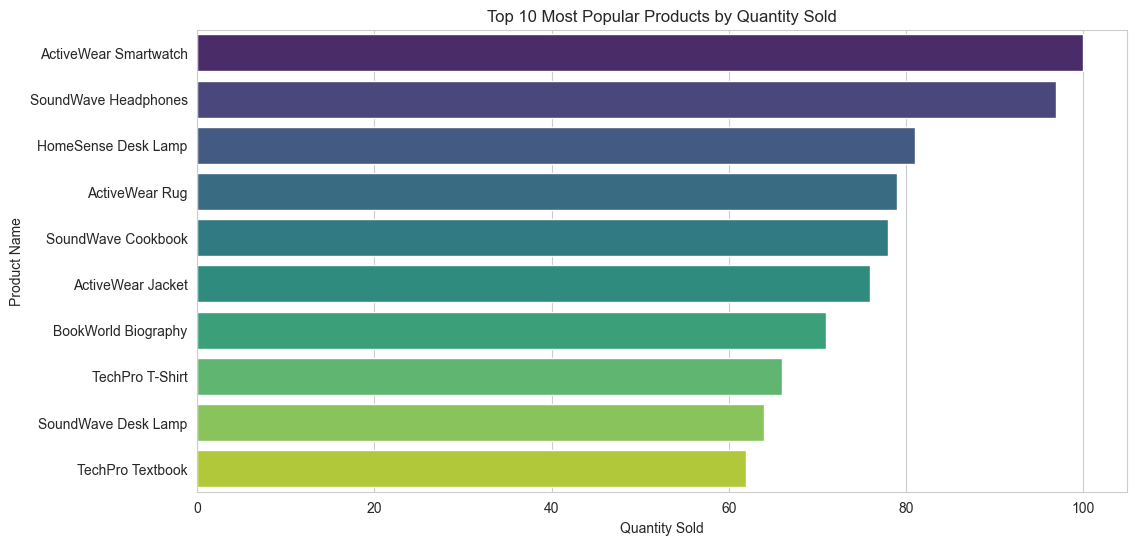

C:\Users\Jeevanprasath\AppData\Local\Temp\ipykernel_7488\2988551694.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_per_category, x='Category', y='Price', palette='viridis')


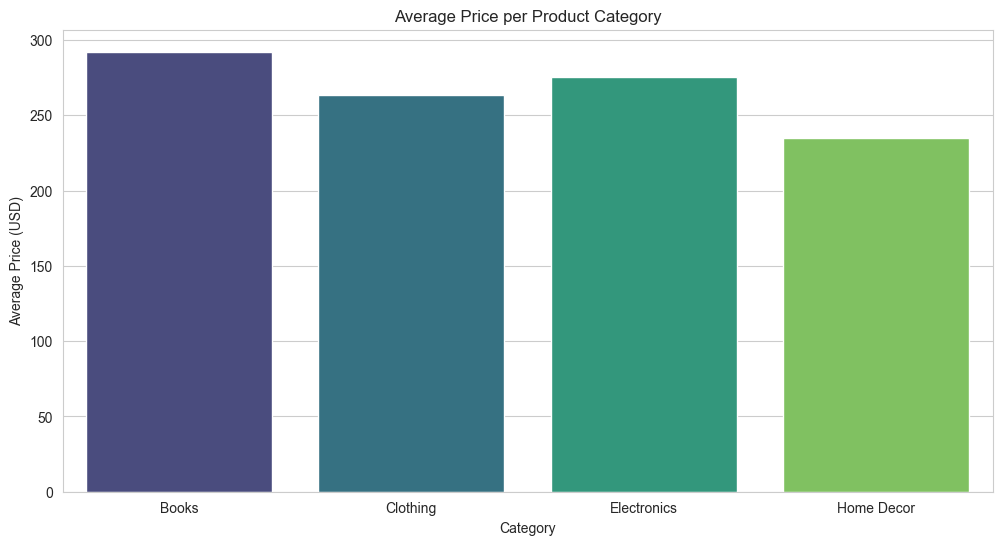

C:\Users\Jeevanprasath\AppData\Local\Temp\ipykernel_7488\2988551694.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_sales_per_category, x='Category', y='TotalValue', palette='viridis')


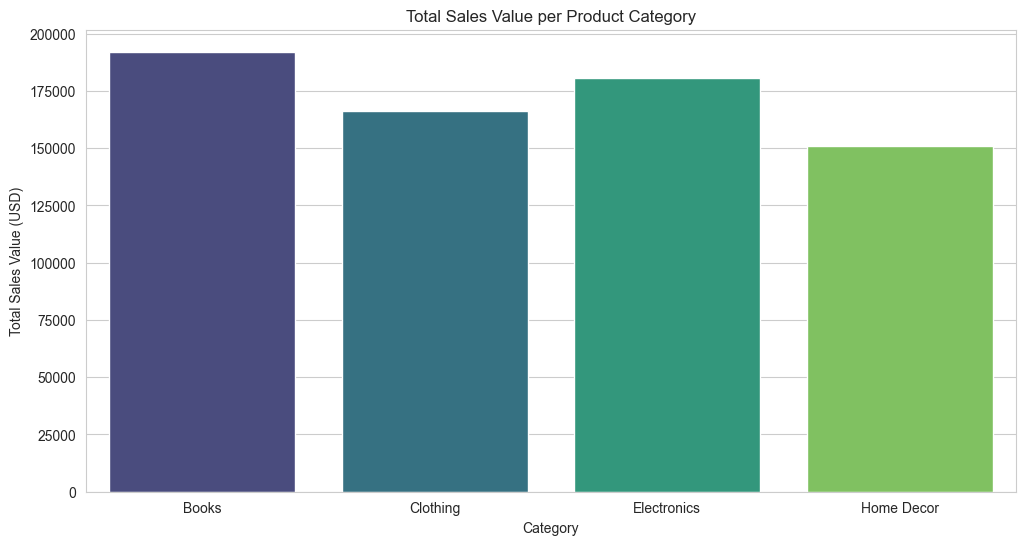

In [21]:
# Product Analysis

# Analyze product category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=products_df, x='Category', palette='viridis')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

# Analyze product pricing distribution
plt.figure(figsize=(10, 6))
sns.histplot(products_df['Price'], bins=30, kde=True, color='blue')
plt.title('Product Pricing Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Identify top 10 most popular products by quantity sold
top_products = merged_df.groupby('ProductName')['Quantity'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Quantity', y='ProductName', palette='viridis')
plt.title('Top 10 Most Popular Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

# Analyze average price per product category
avg_price_per_category = products_df.groupby('Category')['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_per_category, x='Category', y='Price', palette='viridis')
plt.title('Average Price per Product Category')
plt.xlabel('Category')
plt.ylabel('Average Price (USD)')
plt.show()

# Analyze total sales value per product category
total_sales_per_category = merged_df.groupby('Category')['TotalValue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=total_sales_per_category, x='Category', y='TotalValue', palette='viridis')
plt.title('Total Sales Value per Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Value (USD)')
plt.show()

# Transaction Analysis
Analyze transaction data to understand sales trends, customer purchasing behavior, and revenue patterns.

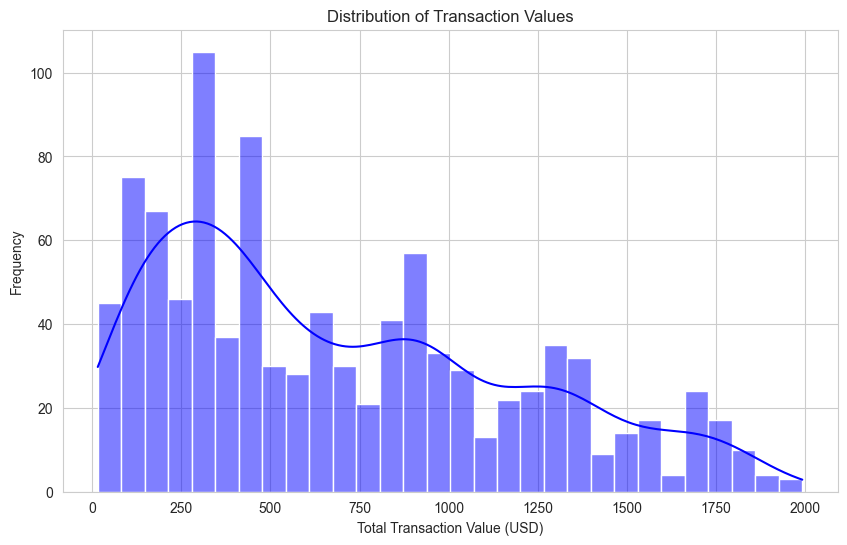

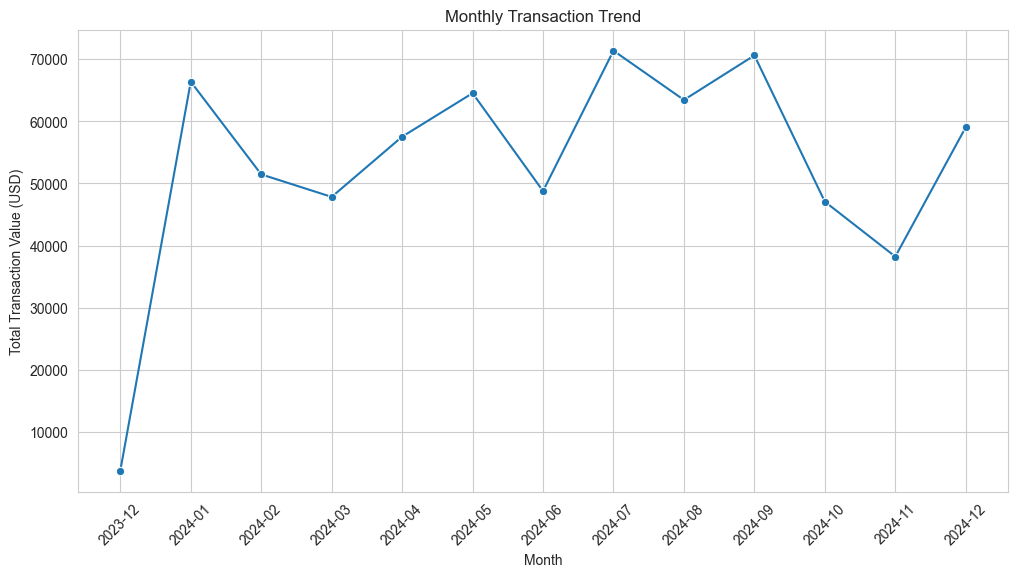

C:\Users\Jeevanprasath\AppData\Local\Temp\ipykernel_7488\3656187023.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='TotalValue', y='CustomerName', palette='viridis')


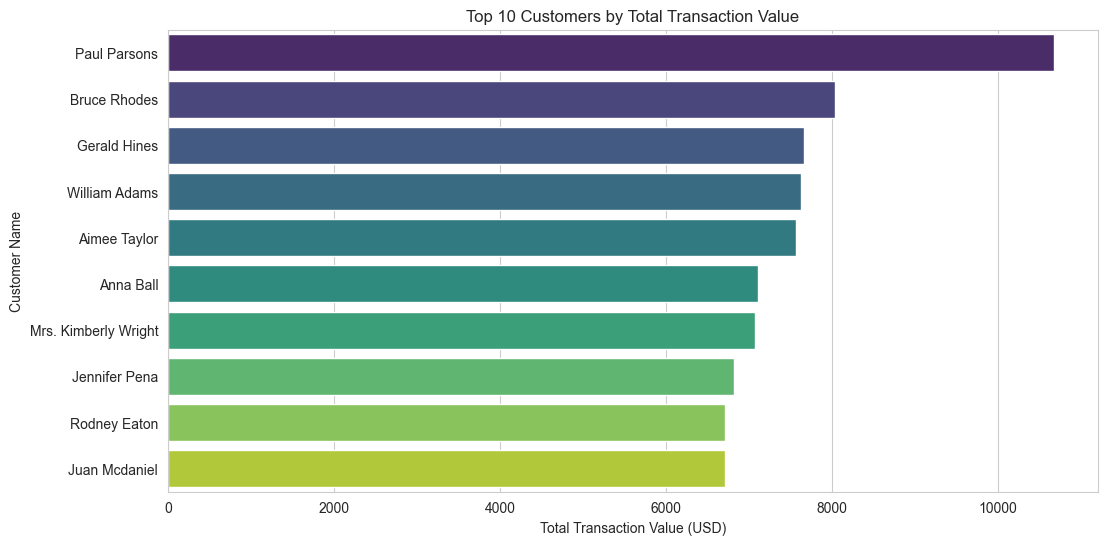

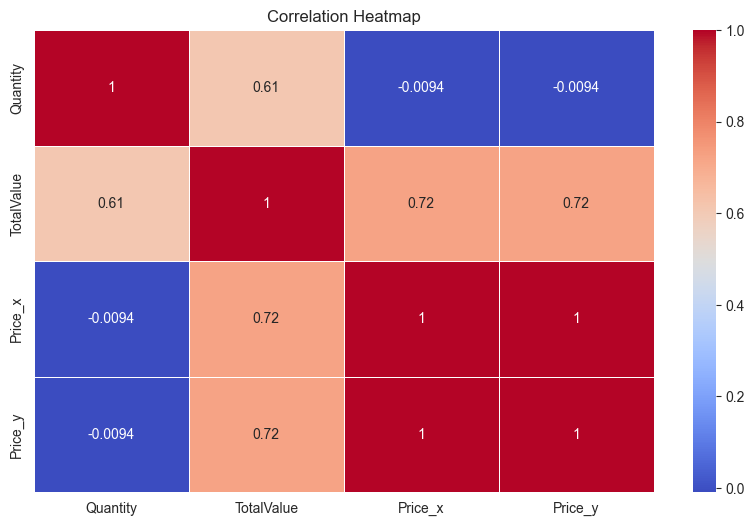

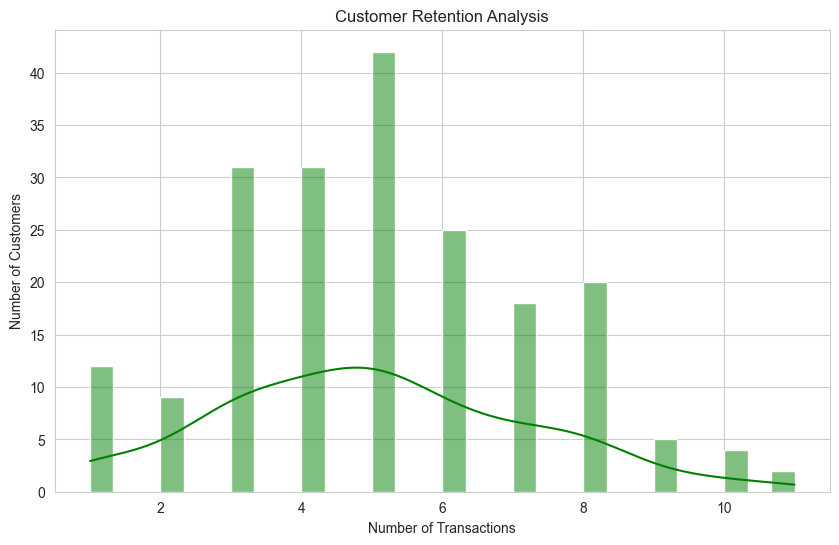

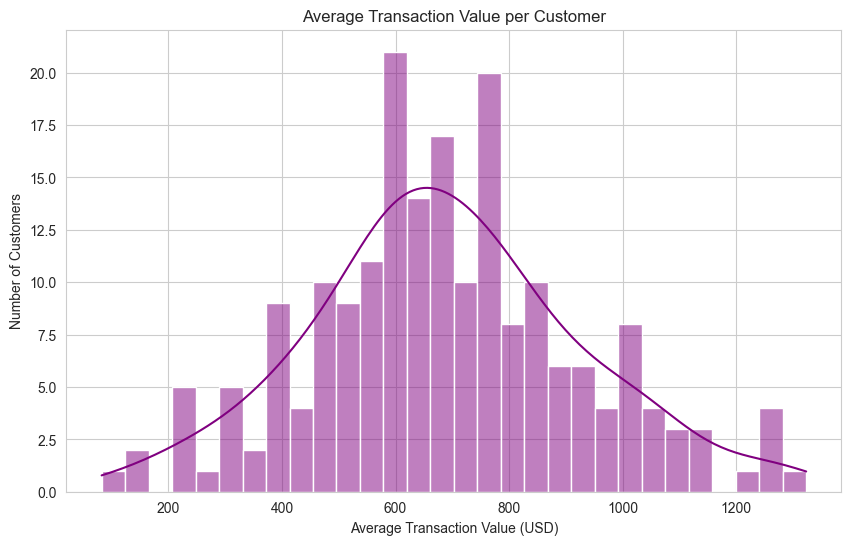

In [24]:
# Transaction Analysis

# Analyze the distribution of transaction values
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['TotalValue'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Transaction Value (USD)')
plt.ylabel('Frequency')
plt.show()

# Convert 'TransactionDate' to datetime if it's not already
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

# Extract 'TransactionMonth' from 'TransactionDate'
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')

# Group by 'TransactionMonth' and sum the 'TotalValue'
monthly_trend = merged_df.groupby('TransactionMonth')['TotalValue'].sum().reset_index()

# Convert 'TransactionMonth' to string for plotting
monthly_trend['TransactionMonth'] = monthly_trend['TransactionMonth'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='TransactionMonth', y='TotalValue', marker='o')
plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value (USD)')
plt.xticks(rotation=45)
plt.show()

# Top 10 customers by total transaction value
top_customers = merged_df.groupby('CustomerName')['TotalValue'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='TotalValue', y='CustomerName', palette='viridis')
plt.title('Top 10 Customers by Total Transaction Value')
plt.xlabel('Total Transaction Value (USD)')
plt.ylabel('Customer Name')
plt.show()

numeric_df = merged_df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
# Analyze the number of transactions per customer
customer_transactions = merged_df.groupby('CustomerID').size().reset_index(name='TransactionCount')

plt.figure(figsize=(10, 6))
sns.histplot(customer_transactions['TransactionCount'], bins=30, kde=True, color='green')
plt.title('Customer Retention Analysis')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

# Analyze average transaction value per customer
avg_transaction_value = merged_df.groupby('CustomerID')['TotalValue'].mean().reset_index(name='AvgTransactionValue')

plt.figure(figsize=(10, 6))
sns.histplot(avg_transaction_value['AvgTransactionValue'], bins=30, kde=True, color='purple')
plt.title('Average Transaction Value per Customer')
plt.xlabel('Average Transaction Value (USD)')
plt.ylabel('Number of Customers')
plt.show()

# Derive Business Insights
Derive at least 5 business insights from the EDA and write them in short point-wise sentences.

In [1]:
# Derive Business Insights

# Insight 1: Top 10 Customers by Total Transaction Value
top_customers_insight = top_customers.copy()
top_customers_insight['Insight'] = 'Top 10 customers by total transaction value.'

# Insight 2: Monthly Transaction Trend
monthly_trend_insight = monthly_trend.copy()
monthly_trend_insight['Insight'] = 'Monthly transaction trend shows the total transaction value over time.'

# Insight 3: Product Category Distribution
product_category_distribution = products_df['Category'].value_counts().reset_index()
product_category_distribution.columns = ['Category', 'Count']
product_category_distribution['Insight'] = 'Distribution of products across different categories.'

# Insight 4: Average Price per Product Category
avg_price_per_category_insight = avg_price_per_category.copy()
avg_price_per_category_insight['Insight'] = 'Average price per product category.'

# Insight 5: Customer Retention Analysis
customer_retention_insight = customer_transactions.copy()
customer_retention_insight['Insight'] = 'Customer retention analysis based on the number of transactions per customer.'

# Combine all insights into a single DataFrame
business_insights = pd.concat([
    top_customers_insight[['CustomerName', 'TotalValue', 'Insight']],
    monthly_trend_insight[['TransactionMonth', 'TotalValue', 'Insight']],
    product_category_distribution[['Category', 'Count', 'Insight']],
    avg_price_per_category_insight[['Category', 'Price', 'Insight']],
    customer_retention_insight[['CustomerID', 'TransactionCount', 'Insight']]
], ignore_index=True)

# Display the business insights
print("Business Insights:")
print(business_insights)

NameError: name 'top_customers' is not defined